In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install accelerate -U
!pip install transformers[torch]
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
model_name1 = "./drive/MyDrive/mT5_albert_100k/model"
model_name2 = "./drive/MyDrive/mT5_albert_200k"

In [ ]:
from transformers import AutoTokenizer, MT5ForConditionalGeneration
from transformers import DataCollatorForSeq2Seq
from transformers import AutoModelForSeq2SeqLM, Seq2SeqTrainingArguments, Seq2SeqTrainer
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import MT5ForConditionalGeneration

In [ ]:
model_100k = MT5ForConditionalGeneration.from_pretrained(model_name1)
model_200k = MT5ForConditionalGeneration.from_pretrained(model_name2)

In [ ]:
def translate_text(text, model, tokenizer):
    inputs = tokenizer.encode("translate English to French: " + text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=64, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_text

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("google/mt5-small")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/82.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/553 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
import pandas as pd


file_path = '/content/drive/My Drive/ColabNotebooks/filtered_en-fr.csv'

header = pd.read_csv(file_path, nrows=0).columns.tolist()
test_df = pd.read_csv(file_path, skiprows=200000, nrows=201, header=None)
test_df.columns = header

print(test_df)

                                                    en  \
0     15.5.2006 — Case C-410/05 — Commission v Greece.   
1     DND Photo Another LAV III protective detachment.   
2    Landborder Conference Date(s): 2005-06-13 to 2...   
3    • Recognize behaviour change as necessary thro...   
4    Some fishers also hold licences to fish herrin...   
..                                                 ...   
196  Bank Al-Maghrib, Ministry of Finance and Priva...   
197  However, it determined this is not part of CIH...   
198                     • Voluntary Sector IAB members   
199  Informants who mentioned these decisions viewe...   
200  In Armenia there are 235 000 refugees as compa...   

                                                    fr  
0    7.3.2006 — Affaire C-323/05 — Commission/Royau...  
1    photo du MDN Un autre détachement de protectio...  
2    Conférence sur la frontière terrestre Date(s) ...  
3    • Le changement de comportement doit être reco...  
4    Certains pêch

In [ ]:
!pip install evaluate
!pip install unbabel-comet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 529.7/529.7 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but

In [ ]:
from nltk.translate.bleu_score import sentence_bleu
from evaluate import load
from nltk.translate.bleu_score import corpus_bleu
import numpy as np
import pandas as pd
comet_metric = load('comet')


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.2.4. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:188: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


### Calculating BLUE and COMET for model 100k data

In [ ]:
source = test_df['en'].tolist()
hypothesis = [translate_text(text, model_100k, tokenizer) for text in source]
reference = test_df['fr'].tolist()

#COMET score
comet_results = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)

#BLUE score
def calculate_bleu_score(reference, candidate):
    return corpus_bleu([[ref] for ref in reference], candidate)

bleu_scores = [calculate_bleu_score([ref], [hyp]) for ref, hyp in zip(reference, hypothesis)]

average_bleu_score = sum(bleu_scores) / len(bleu_scores)

average_comet_score = np.mean(comet_results["scores"])

print("Average BLUE score", average_bleu_score)
print("Average COMET score", average_comet_score)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA L4') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a d

Average BLUE score 0.42398479938748995
Average COMET score 0.6742683421468261


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

### Calculating BLUE and COMET for model 200k data

In [ ]:
source = test_df['en'].tolist()
hypothesis = [translate_text(text, model_200k, tokenizer) for text in source]
reference = test_df['fr'].tolist()

#COMET score
comet_results = comet_metric.compute(predictions=hypothesis, references=reference, sources=source)

#BLUE score
def calculate_bleu_score(reference, candidate):
    return corpus_bleu([[ref] for ref in reference], candidate)

bleu_scores = [calculate_bleu_score([ref], [hyp]) for ref, hyp in zip(reference, hypothesis)]

average_bleu_score = sum(bleu_scores) / len(bleu_scores)

average_comet_score = np.mean(comet_results["scores"])

print("Average BLUE score", average_bleu_score)
print("Average COMET score", average_comet_score)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Average BLUE score 0.44105867833948786
Average COMET score 0.6934882266011404


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
pip install matplotlib seaborn

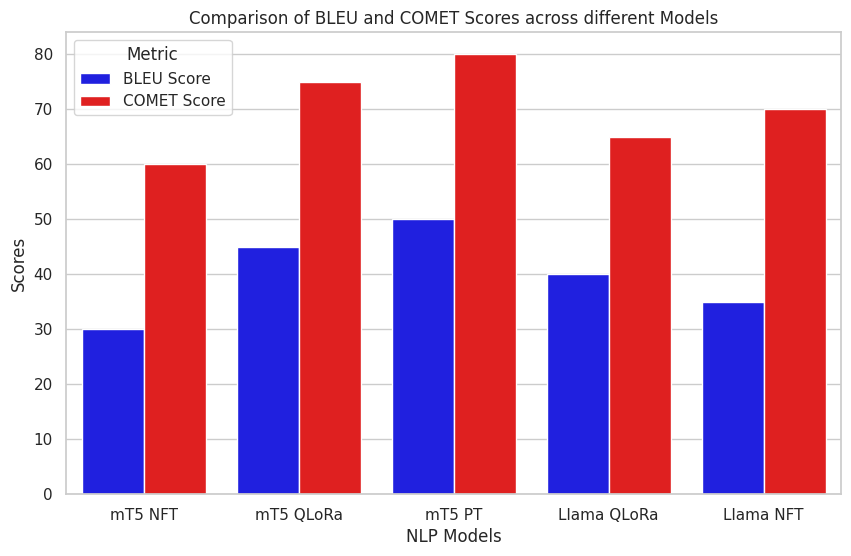

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'Model': ['mT5 NFT', 'mT5 QLoRa', 'mT5 PT', 'Llama QLoRa', 'Llama NFT'],
    'BLEU Score': [30, 45, 50, 40, 35],
    'COMET Score': [60, 75, 80, 65, 70]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Model', value_vars=['BLEU Score', 'COMET Score'], var_name='Metric', value_name='Score')
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette={'BLEU Score': 'blue', 'COMET Score': 'red'})
plt.xlabel('NLP Models')
plt.ylabel('Scores')
plt.title('Comparison of BLEU and COMET Scores across different Models')
plt.show()

###Qlora Llama 2:
Average BLUE score 0.5205010252866881

Average COMET score 0.7686026763916015


###Qlora mT5
Average BLUE score 0.26487826072841497

Average COMET score 0.5170456299930811


###Fine tuning mT5
Average BLUE score 0.44105867833948786

Average COMET score 0.6934882266011404

###Prompt tuning mT5
Average BLUE score

Average COMET score

In [ ]:
pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 5.6 MB/s eta 0:00:00


In [ ]:
from docx import Document

def translate_text(text, model, tokenizer):
    inputs = tokenizer.encode("translate English to French: " + text, return_tensors="pt")
    outputs = model.generate(inputs, max_length=64, num_beams=4, early_stopping=True)
    translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

    return translated_text

doc = Document()
for i, (index, row) in enumerate(test_df.iterrows(), 1):
    english_sentence = row['en']
    target_french_sentence = row['fr']
    translated_french_sentence = translate_text(english_sentence, model_200k, tokenizer)
    doc.add_paragraph(f"{i}) English Sentence: {english_sentence}")
    doc.add_paragraph(f"   Translated French Sentence: {translated_french_sentence}")
    doc.add_paragraph(f"   Target French Sentence: {target_french_sentence}")
    doc.add_paragraph()

doc.save("translated_sentences.docx")